In [2]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [64]:
import requests
import pandas as pd
import os 
from dotenv import load_dotenv
import base64
from requests import post , get
import json
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [9]:
client_id=" "
client_secret=" "

In [13]:
auth_string = f"{client_id}:{client_secret}"
auth_bytes = auth_string.encode("utf-8")
auth_base64 = base64.b64encode(auth_bytes).decode("utf-8")

url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': 'Basic ' + auth_base64
}
data = {
    'grant_type': 'client_credentials'
}

response = requests.post(url, headers=headers, data=data)
json_result = response.json()

if response.status_code == 200:
    token = json_result['access_token']
    print('Access Token: alındı')
else:
    print('Error:', response.status_code)
    print('Response:', json_result)


Access Token: alındı


In [18]:
def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}

    try:
        result = requests.post(url, headers=headers, data=data)
        result.raise_for_status()  # HTTP hata durumlarını kontrol et

        json_result = result.json()
        token = json_result.get("access_token")

        if token is not None:
            return token
        else:
            print("Erişim belirteci alınamadı.")
            return None

    except requests.exceptions.RequestException as e:
        print("Hata:", e)
        return None

def get_auth_header(token):
    return {
        "Authorization": f"Bearer {token}"
    }

def search_for_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = f"?q={artist_name}&type=artist&limit=1"
    query_url = url + query

    try:
        result = requests.get(query_url, headers=headers)
        result.raise_for_status()  # HTTP hata durumlarını kontrol et

        json_result = result.json()

        if "error" in json_result:
            print(f"Spotify API Hatası: {json_result['error']['message']}")
        else:
            print(json_result)

    except requests.exceptions.RequestException as e:
        print("Hata:", e)

# Ardından, token almak ve search_for_artist fonksiyonunu çağırmak için şu kodu kullanabilirsiniz:
token = get_token()  # get_token fonksiyonunuzu kullanarak token alın

if token is not None:
    search_for_artist(token, "rihanna")
else:
    print("Erişim belirteci alınamadı.")


{'artists': {'href': 'https://api.spotify.com/v1/search?query=rihanna&type=artist&offset=0&limit=1', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H'}, 'followers': {'href': None, 'total': 58727522}, 'genres': ['barbadian pop', 'pop', 'urban contemporary'], 'href': 'https://api.spotify.com/v1/artists/5pKCCKE2ajJHZ9KAiaK11H', 'id': '5pKCCKE2ajJHZ9KAiaK11H', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb99e4fca7c0b7cb166d915789', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab6761610000517499e4fca7c0b7cb166d915789', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f17899e4fca7c0b7cb166d915789', 'width': 160}], 'name': 'Rihanna', 'popularity': 88, 'type': 'artist', 'uri': 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H'}], 'limit': 1, 'next': 'https://api.spotify.com/v1/search?query=rihanna&type=artist&offset=1&limit=1', 'offset': 0, 'previous': None, 'total': 13}}


In [19]:
### {'artists': {'href': 'https://api.spotify.com/v1/search?query=rihanna&type=artist&offset=0&limit=1', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H'}, 'followers': {'href': None, 'total': 58744132}, 'genres': ['barbadian pop', 'pop', 'urban contemporary'], 'href': 'https://api.spotify.com/v1/artists/5pKCCKE2ajJHZ9KAiaK11H', 'id': '5pKCCKE2ajJHZ9KAiaK11H', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb99e4fca7c0b7cb166d915789', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab6761610000517499e4fca7c0b7cb166d915789', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f17899e4fca7c0b7cb166d915789', 'width': 160}], 'name': 'Rihanna', 'popularity': 88, 'type': 'artist', 'uri': 'spotify:artist:5pKCCKE2ajJHZ9KAiaK11H'}], 'limit': 1, 'next': 'https://api.spotify.com/v1/search?query=rihanna&type=artist&offset=1&limit=1', 'offset': 0, 'previous': None, 'total': 20}}

In [20]:
def get_artist_id(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = f"?q={artist_name}&type=artist&limit=1"
    query_url = url + query

    try:
        result = requests.get(query_url, headers=headers)
        result.raise_for_status()

        json_result = result.json()

        if "artists" in json_result and "items" in json_result["artists"]:
            # İlk bulunan sanatçının ID'sini al
            first_artist = json_result["artists"]["items"][0]
            artist_id = first_artist["id"]
            return artist_id
        else:
            print("Sanatçı bulunamadı.")

    except requests.exceptions.RequestException as e:
        print("Hata:", e)

# Örneğin, Rihanna'nın ID'sini almak için:
rihanna_id = get_artist_id(token, "Rihanna")
print("Rihanna'nın Spotify ID'si:", rihanna_id)


Rihanna'nın Spotify ID'si: 5pKCCKE2ajJHZ9KAiaK11H


In [21]:
def get_artist_tracks(token, artist_id):
    url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
    headers = get_auth_header(token)
    country = "US"  # Kullanıcı ülke kodu, örneğin "US" (Amerika Birleşik Devletleri)
    query = f"?country={country}"
    query_url = url + query

    try:
        result = requests.get(query_url, headers=headers)
        result.raise_for_status()

        json_result = result.json()

        if "tracks" in json_result:
            tracks = json_result["tracks"]
            for track in tracks:
                print("Şarkı Adı:", track["name"])

        else:
            print("Şarkılar bulunamadı.")

    except requests.exceptions.RequestException as e:
        print("Hata:", e)

# Örneğin, Rihanna'nın Spotify ID'sini aldıktan sonra şarkılarını getir:
rihanna_id = get_artist_id(token, "Rihanna")
get_artist_tracks(token, rihanna_id)


Şarkı Adı: We Found Love
Şarkı Adı: Diamonds
Şarkı Adı: Umbrella
Şarkı Adı: Love On The Brain
Şarkı Adı: Only Girl (In The World)
Şarkı Adı: Stay
Şarkı Adı: S&M
Şarkı Adı: This Is What You Came For
Şarkı Adı: Needed Me
Şarkı Adı: Don't Stop The Music


In [22]:
def get_artist_tracks(token, artist_id):
    url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
    headers = get_auth_header(token)
    country = "US"  # Kullanıcı ülke kodu, örneğin "US" (Amerika Birleşik Devletleri)
    query = f"?country={country}"
    query_url = url + query

    try:
        result = requests.get(query_url, headers=headers)
        result.raise_for_status()

        json_result = result.json()

        if "tracks" in json_result:
            tracks = json_result["tracks"]
            track_data = []

            for track in tracks:
                track_data.append({
                    "Şarkı Adı": track["name"],
                    "Popülerlik": track["popularity"],
                    "Şarkı URL": track["external_urls"]["spotify"],
                    "Dakika": track["duration_ms"] / 60000  # Millisaniyeden dakikaya çevirme
                })

            df = pd.DataFrame(track_data)
            return df

        else:
            print("Şarkılar bulunamadı.")
            return None

    except requests.exceptions.RequestException as e:
        print("Hata:", e)
        return None

# Örneğin, Rihanna'nın Spotify ID'sini aldıktan sonra şarkılarını DataFrame'e dönüştür:
rihanna_id = get_artist_id(token, "Rihanna")
rihanna_tracks_df = get_artist_tracks(token, rihanna_id)

# DataFrame'i yazdır:
print(rihanna_tracks_df)


                   Şarkı Adı  Popülerlik  \
0              We Found Love          85   
1                   Diamonds          76   
2                   Umbrella          74   
3          Love On The Brain          86   
4   Only Girl (In The World)          84   
5                       Stay          73   
6                        S&M          82   
7  This Is What You Came For          84   
8                  Needed Me          83   
9       Don't Stop The Music          71   

                                           Şarkı URL    Dakika  
0  https://open.spotify.com/track/6qn9YLKt13AGvpq...  3.587100  
1  https://open.spotify.com/track/1z9kQ14XBSN0r2v...  3.752433  
2  https://open.spotify.com/track/2yPoXCs7BSIUruc...  4.599767  
3  https://open.spotify.com/track/5oO3drDxtziYU2H...  3.733333  
4  https://open.spotify.com/track/2ENexcMEMsYk0rV...  3.924883  
5  https://open.spotify.com/track/789CxjEOtO76BVD...  4.011767  
6  https://open.spotify.com/track/7ySUcLPVX7Kudhn...  4.0600

In [23]:
#from IPython.display import display
# Diğer fonksiyonları ekleyin ve kullanıcıdan token almayı unutmayın...
# Örneğin, Rihanna'nın Spotify ID'sini aldıktan sonra şarkılarını DataFrame'e dönüştür:
rihanna_id = get_artist_id(token, "Rihanna")
rihanna_tracks_df = get_artist_tracks(token, rihanna_id)

# DataFrame'i göster:
display(rihanna_tracks_df)


,Şarkı Adı,Popülerlik,Şarkı URL,Dakika
0,We Found Love,85,https://open.spotify.com/track/6qn9YLKt13AGvpq...,3.587100
1,Diamonds,76,https://open.spotify.com/track/1z9kQ14XBSN0r2v...,3.752433
2,Umbrella,74,https://open.spotify.com/track/2yPoXCs7BSIUruc...,4.599767
3,Love On The Brain,86,https://open.spotify.com/track/5oO3drDxtziYU2H...,3.733333
4,Only Girl (In The World),84,https://open.spotify.com/track/2ENexcMEMsYk0rV...,3.924883
5,Stay,73,https://open.spotify.com/track/789CxjEOtO76BVD...,4.011767
6,S&M,82,https://open.spotify.com/track/7ySUcLPVX7Kudhn...,4.060000
7,This Is What You Came For,84,https://open.spotify.com/track/0azC730Exh71aQl...,3.702667
8,Needed Me,83,https://open.spotify.com/track/4pAl7FkDMNBsjyk...,3.193333
9,Don't Stop The Music,71,https://open.spotify.com/track/1Jo0Zg7XlrA6z0m...,4.451333


In [32]:
# Dakika sütununu noktadan sonra 1 basamağa kadar düzenleme
rihanna_tracks_df['Dakika'] = rihanna_tracks_df['Dakika'].apply(lambda x: round(x, 1))

In [35]:
rihanna_tracks_df["Dakika"]

0    3.6
1    3.8
2    4.6
3    3.7
4    3.9
5    4.0
6    4.1
7    3.7
8    3.2
9    4.5
Name: Dakika, dtype: float64

##### dataframe'i görselleştirelim

<Axes: xlabel='Popülerlik', ylabel='Dakika'>

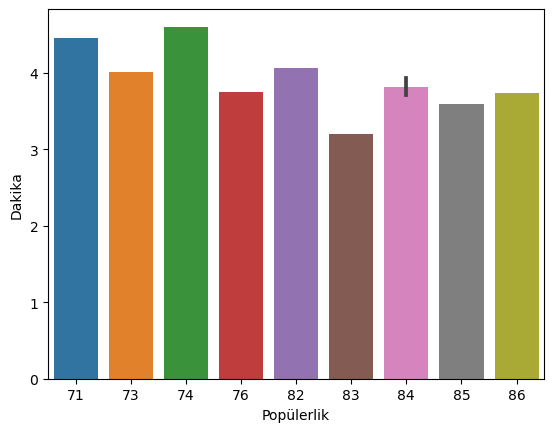

In [24]:
sns.barplot(x="Popülerlik",y="Dakika",data=rihanna_tracks_df)

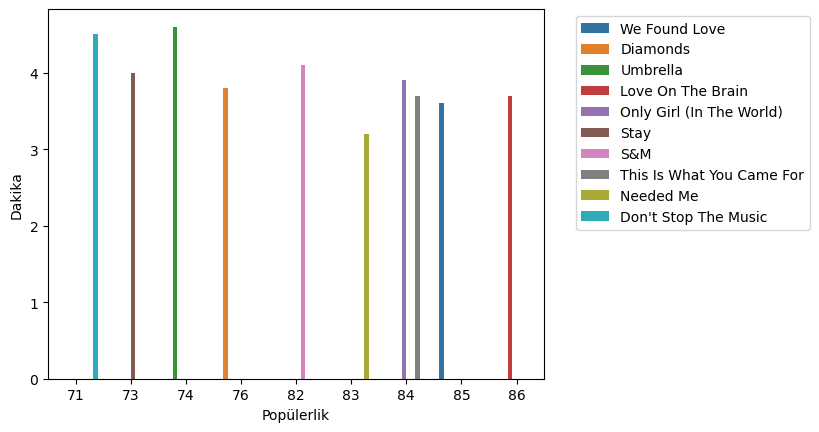

In [33]:
ax=sns.barplot(x="Popülerlik",y="Dakika",hue="Şarkı Adı" ,data=rihanna_tracks_df)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='Dakika', ylabel='Şarkı Adı'>

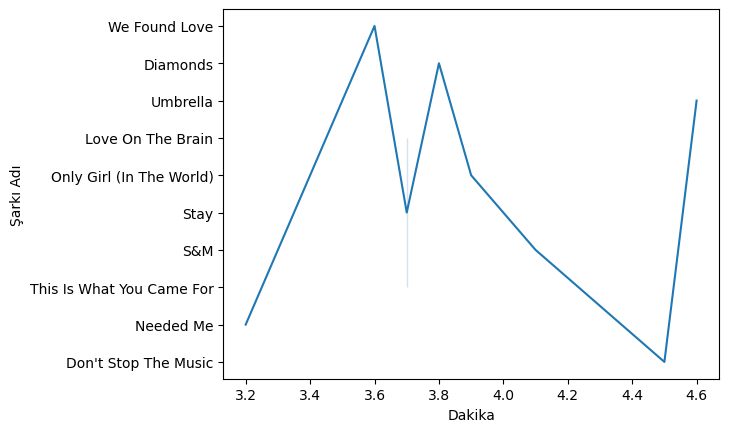

In [34]:
sns.lineplot(x="Dakika",y="Şarkı Adı",data=rihanna_tracks_df)

c:\Users\incie\anaconda3_\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


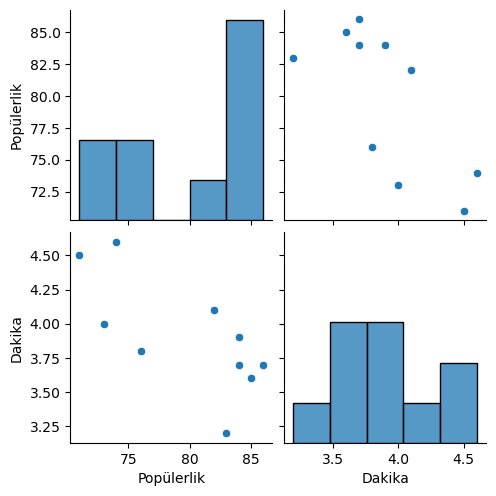

In [46]:
sns.pairplot(rihanna_tracks_df)

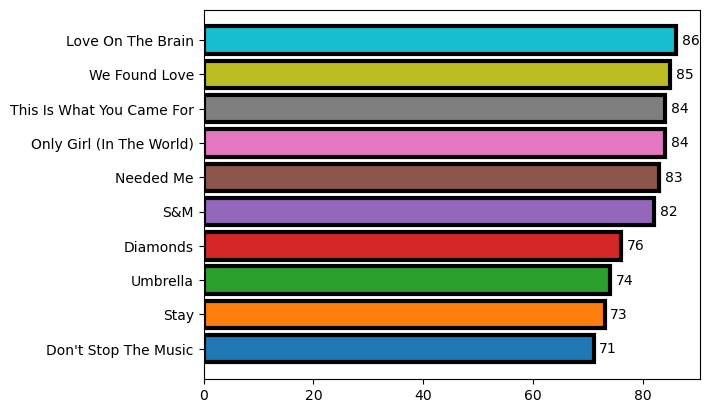

In [66]:
df = rihanna_tracks_df.sort_values(by=['Popülerlik'])
my_plot = plt.barh(
    y=df["Şarkı Adı"],
    width=df["Popülerlik"],
    color=mcolors.TABLEAU_COLORS,
    edgecolor='black',
    linewidth=3
    )
plt.bar_label(container=my_plot, padding=4)
plt.show()